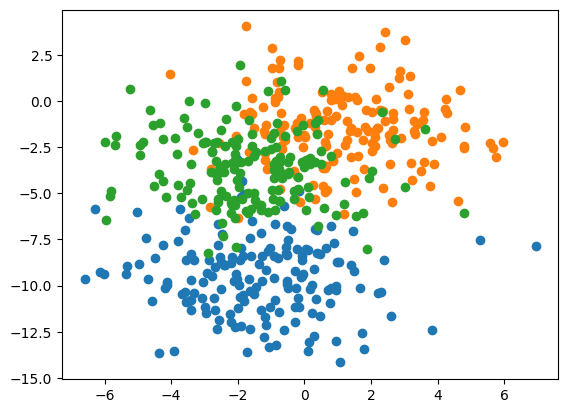

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

Train: 0.840, Test: 0.757


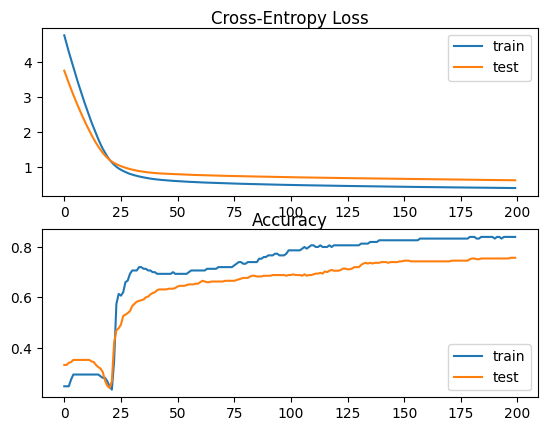

In [2]:
# fit high variance mlp on blobs classification problem
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

>0.832
>0.816
>0.832
>0.820
>0.844
>0.790
>0.792
>0.856
>0.832
>0.798
Estimated Accuracy 0.821 (0.021)
1563/1563 [==============================] - 8s 5ms/step
> 1: single=0.819, ensemble=0.819
1563/1563 [==============================] - 2s 1ms/step
> 2: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 3: single=0.819, ensemble=0.820
1563/1563 [==============================] - 2s 2ms/step
> 4: single=0.818, ensemble=0.820
1563/1563 [==============================] - 3s 2ms/step
> 5: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 6: single=0.819, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 7: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 8: single=0.819, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 9: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 10: single=0.820, e

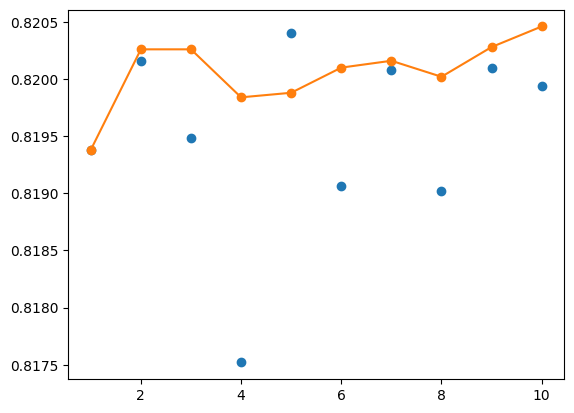

In [3]:
# random-splits mlp ensemble on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import argmax
import numpy

# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
  # encode targets
  trainy_enc = to_categorical(trainy)
  testy_enc = to_categorical(testy)
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  model.fit(trainX, trainy_enc, epochs=50, verbose=0)
  # evaluate the model
  _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
  return model, test_acc

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
  # make predictions
  yhats = [model.predict(testX) for model in members]
  yhats = array(yhats)
  # sum across ensemble members
  summed = numpy.sum(yhats, axis=0)
  # argmax across classes
  result = argmax(summed, axis=1)
  return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  # make prediction
  yhat = ensemble_predictions(subset, testX)
  # calculate accuracy
  return accuracy_score(testy, yhat)

# generate 2d classification dataset
dataX, datay = make_blobs(n_samples=55000, centers=3, n_features=2, cluster_std=2,
random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]
# multiple train-test splits
n_splits = 10
scores, members = list(), list()
for _ in range(n_splits):
  # split data
  trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.10)
  # evaluate model
  model, test_acc = evaluate_model(trainX, trainy, testX, testy)
  print('>%.3f' % test_acc)
  scores.append(test_acc)
  members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
  ensemble_score = evaluate_n_members(members, i, newX, newy)
  newy_enc = to_categorical(newy)
  _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
  print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

>0.816
>0.852
>0.858
>0.822
>0.810
>0.812
>0.812
>0.820
>0.816
>0.838
Estimated Accuracy 0.826 (0.017)
1563/1563 [==============================] - 2s 1ms/step
> 1: single=0.820, ensemble=0.820
1563/1563 [==============================] - 3s 2ms/step
> 2: single=0.819, ensemble=0.820
1563/1563 [==============================] - 3s 2ms/step
> 3: single=0.820, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 4: single=0.820, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 5: single=0.820, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 6: single=0.819, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 7: single=0.821, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 8: single=0.819, ensemble=0.821
1563/1563 [==============================] - 3s 2ms/step
> 9: single=0.820, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 10: single=0.820, e

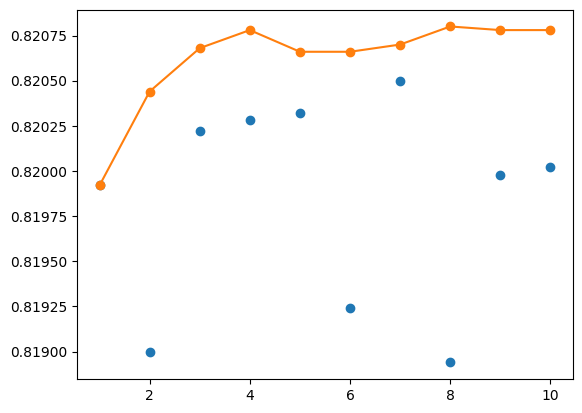

In [6]:
# random-splits mlp ensemble on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import argmax
import numpy

# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
  # encode targets
  trainy_enc = to_categorical(trainy)
  testy_enc = to_categorical(testy)
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  model.fit(trainX, trainy_enc, epochs=50, verbose=0)
  # evaluate the model
  _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
  return model, test_acc

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
  # make predictions
  yhats = [model.predict(testX) for model in members]
  yhats = array(yhats)
  # sum across ensemble members
  summed = numpy.sum(yhats, axis=0)
  # argmax across classes
  result = argmax(summed, axis=1)
  return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  # make prediction
  yhat = ensemble_predictions(subset, testX)
  # calculate accuracy
  return accuracy_score(testy, yhat)

# generate 2d classification dataset
dataX, datay = make_blobs(n_samples=55000, centers=3, n_features=2, cluster_std=2,
random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]
# prepare the k-fold cross-validation configuration
n_folds = 10
kfold = KFold(n_folds)
# cross validation estimation of performance
scores, members = list(), list()
for train_ix, test_ix in kfold.split(X):
  # select samples
  trainX, trainy = X[train_ix], y[train_ix]
  testX, testy = X[test_ix], y[test_ix]
  # evaluate model
  model, test_acc = evaluate_model(trainX, trainy, testX, testy)
  print('>%.3f' % test_acc)
  scores.append(test_acc)
  members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_folds+1):
  ensemble_score = evaluate_n_members(members, i, newX, newy)
  newy_enc = to_categorical(newy)
  _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
  print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_folds+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [ ]:
# random-splits mlp ensemble on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import argmax
import numpy

# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
  # encode targets
  trainy_enc = to_categorical(trainy)
  testy_enc = to_categorical(testy)
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  model.fit(trainX, trainy_enc, epochs=50, verbose=0)
  # evaluate the model
  _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
  return model, test_acc

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
  # make predictions
  yhats = [model.predict(testX) for model in members]
  yhats = array(yhats)
  # sum across ensemble members
  summed = numpy.sum(yhats, axis=0)
  # argmax across classes
  result = argmax(summed, axis=1)
  return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  # select a subset of members
  subset = members[:n_members]
  # make prediction
  yhat = ensemble_predictions(subset, testX)
  # calculate accuracy
  return accuracy_score(testy, yhat)

# generate 2d classification dataset
dataX, datay = make_blobs(n_samples=55000, centers=3, n_features=2, cluster_std=2,
random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]
#multiple train-test splits
n_splits = 10
scores, members = list(), list()
for _ in range(n_splits):
  # select indexes
  ix = [i for i in range(len(X))]
  train_ix = resample(ix, replace=True, n_samples=4500)
  test_ix = [x for x in ix if x not in train_ix]
  # select data
  trainX, trainy = X[train_ix], y[train_ix]
  testX, testy = X[test_ix], y[test_ix]
  # evaluate model
  model, test_acc = evaluate_model(trainX, trainy, testX, testy)
  print('>%.3f' % test_acc)
  scores.append(test_acc)
  members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
  ensemble_score = evaluate_n_members(members, i, newX, newy)
  newy_enc = to_categorical(newy)
  _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
  print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
  ensemble_scores.append(ensemble_score)
  single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

>0.835
>0.822
>0.835
>0.831
>0.829
>0.829
>0.814
>0.825
>0.826
>0.820
Estimated Accuracy 0.827 (0.006)
1563/1563 [==============================] - 3s 2ms/step
> 1: single=0.819, ensemble=0.819
1563/1563 [==============================] - 2s 1ms/step
> 2: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 3: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 4: single=0.819, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 5: single=0.819, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 6: single=0.820, ensemble=0.821
1563/1563 [==============================] - 2s 1ms/step
> 7: single=0.820, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 8: single=0.818, ensemble=0.820
1563/1563 [==============================] - 2s 1ms/step
> 9: single=0.820, ensemble=0.820
  41/1563 [..............................] - ETA: 1s 